In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix


In [2]:
file = "customer_shopping_data_processed.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Day of week
0,0,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,Sunday
1,1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Sunday
2,2,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,Saturday
3,3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Sunday
4,4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,Sunday


In [3]:
df.drop(columns = ['Unnamed: 0', 'invoice_date', 'shopping_mall'], inplace = True)
df.head()

,gender,age,category,quantity,price,payment_method,Day of week
0,Female,28,Clothing,5,1500.40,Credit Card,Sunday
1,Male,21,Shoes,3,1800.51,Debit Card,Sunday
2,Male,20,Clothing,1,300.08,Cash,Saturday
3,Female,66,Shoes,5,3000.85,Credit Card,Sunday
4,Female,53,Books,4,60.60,Cash,Sunday


In [4]:
# X, y = make_regression(random_state=1)
y = df['gender']

X = df.drop(columns = ["gender"])

In [5]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

y_label = LabelEncoder().fit_transform(df['gender'])
y_label

Index(['age', 'quantity', 'price', 'category_Books', 'category_Clothing',
       'category_Cosmetics', 'category_Food & Beverage', 'category_Shoes',
       'category_Souvenir', 'category_Technology', 'category_Toys',
       'payment_method_Cash', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'Day of week_Friday', 'Day of week_Monday',
       'Day of week_Saturday', 'Day of week_Sunday', 'Day of week_Thursday',
       'Day of week_Tuesday', 'Day of week_Wednesday'],
      dtype='object')


array([0, 1, 1, ..., 1, 1, 0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        Female
1          Male
2          Male
3        Female
4        Female
          ...  
99452    Female
99453      Male
99454      Male
99455      Male
99456    Female
Name: gender, Length: 99457, dtype: object

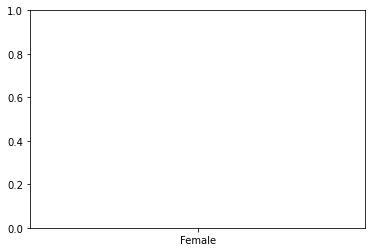

In [27]:
plt.scatter(df['gender'], df['price'], c=y)
plt.show()

In [7]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 15000)
classifier.fit(X_train, y_train)
training_score = classifier.score(X_train, y_train)
testing_score = classifier.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5989382239382239
Testing Score: 0.5954554594811985


In [8]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()
classifier.fit(X_train, y_train)
training_score = classifier.score(X_train, y_train)
testing_score = classifier.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.00015674313899016745
Testing Score: -0.00020101943206274342


<AxesSubplot:>

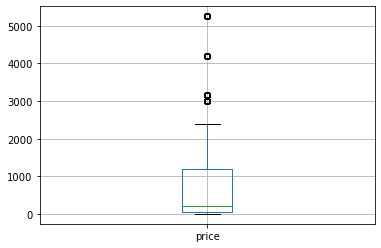

In [9]:
df.boxplot(column='price')

<AxesSubplot:>

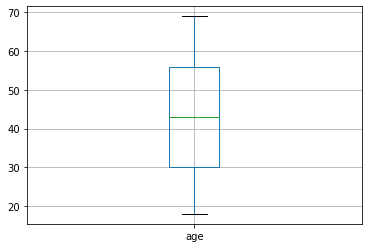

In [10]:
df.boxplot(column='age')

In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

clf = RandomForestClassifier().fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.7626152938652939
Testing Score: 0.5248341041624773


In [14]:
predictions1 = clf.predict(X_test)
print(f"First 10 predictions:   {predictions1[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [0 0 0 1 1 0 0 0 0 0]
First 10 actual labels: [0, 0, 1, 1, 0, 0, 0, 1, 1, 0]


In [17]:
y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[9596, 5210],
       [6605, 3454]], dtype=int64)

In [84]:
# Train a K Neighbor Model and print the model score

classifier = KNeighborsRegressor()
classifier.fit(X_train, y_train)
print(f'Training Score: {classifier.score(X_train, y_train)}')
print(f'Testing Score: {classifier.score(X_test, y_test)}')

Training Score: 0.16736596555771133
Testing Score: -0.20325496831963052


In [18]:
predictions2 = classifier.predict(X_test)
print(f"First 10 predictions:   {predictions2[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [0.40827114 0.39743584 0.39358438 0.40708231 0.42035521 0.40488356
 0.40389632 0.39831524 0.39441664 0.39176597]
First 10 actual labels: [0, 0, 1, 1, 0, 0, 0, 1, 1, 0]


In [20]:
# Train a Extra Trees Classifier model and print the model score

classifier = ExtraTreesRegressor()
classifier.fit(X_train, y_train)
print(f'Training Score: {classifier.score(X_train, y_train)}')
print(f'Testing Score: {classifier.score(X_test, y_test)}')

Training Score: 0.4037076285163519
Testing Score: -0.4525660289243527


In [21]:
predictions3 = classifier.predict(X_test)
print(f"First 10 predictions:   {predictions3[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [0.09       0.16666667 0.         1.         0.845      0.44444444
 0.375      0.345      0.         0.33333333]
First 10 actual labels: [0, 0, 1, 1, 0, 0, 0, 1, 1, 0]


In [93]:
reg = Lasso().fit(X_train, y_train)
reg.score(X_test, y_test)

-5.035383833984497e-05

In [96]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train, y_train)

SelectFromModel(estimator=Lasso())